In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import pandas as pd
import numpy as np


Room type and neighbourhood

In [0]:
path = "/content/drive/My Drive/Continuous Assessment/"
listings = pd.read_csv(path+"listings.csv", sep=",")
listings.head(1)

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (61,62) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,...,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,44077,https://www.airbnb.com/rooms/44077,20200321154917,2020-03-21,cosy comfortable Irish cottage twin,Our house was built in 1937 when there was ple...,"Hi, My name is Teresa and we have 3 rooms ava...",Our house was built in 1937 when there was ple...,none,I like our neighbourhood as there is no shorta...,Dundrum was always known as a Spa Town and the...,There is a bus stop 2 mins up the road from us...,We have a beautiful landscaped garden with tab...,We live on the premises so we are always on ha...,Welcome to our cottage and we hope you will en...,NaN,NaN,https://a0.muscache.com/im/pictures/525706/050...,NaN,193005,https://www.airbnb.com/users/show/193005,Teresa,2010-08-06,Dublin Ireland,"I am a friendly outgoing Irishwoman ,who love...",within an hour,100%,100%,t,https://a0.muscache.com/im/users/193005/profil...,https://a0.muscache.com/im/users/193005/profil...,Churchtown,3.0,3.0,"['email', 'phone', 'facebook', 'reviews', 'jum...",t,f,"Churchtown, Ireland",Churchtown,Dn Laoghaire-Rathdown,...,$0.00,3,1125,3,3,1125,1125,3.0,1125.0,a week ago,t,7,11,23,275,2020-03-21,227,38,2011-03-20,2020-03-06,95.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,NaN,t,f,moderate,t,t,3,0,3,0,2.07


In [0]:
listings=listings.loc(axis=1)['room_type','neighbourhood','latitude','longitude','review_scores_rating','review_scores_accuracy',	'review_scores_cleanliness',	'review_scores_checkin',	'review_scores_communication',	'review_scores_location',	'review_scores_value']
listings.head(1)

,room_type,neighbourhood,latitude,longitude,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
0,Private room,Churchtown,53.28995,-6.25813,95.0,10.0,10.0,10.0,10.0,10.0,10.0


In [0]:
from geopy.geocoders import Nominatim
locator = Nominatim(user_agent=”myGeocoder”)
coordinates = “53.480837, -2.244914”
location = locator.reverse(coordinates)
print(location.address)

SyntaxError: ignored

In [0]:
listings["neighbourhood"].replace('', np.nan, inplace=True)
listings.dropna(subset=['neighbourhood'], inplace=True)

In [0]:
listings['review_scores_accuracy'].replace('', np.nan, inplace=True)
listings.dropna(subset=['review_scores_accuracy'], inplace=True)

In [0]:
listings['review_scores_cleanliness'].replace('', np.nan, inplace=True)
listings.dropna(subset=['review_scores_cleanliness'], inplace=True)

In [0]:
listings['review_scores_checkin'].replace('', np.nan, inplace=True)
listings.dropna(subset=['review_scores_checkin'], inplace=True)

In [0]:
listings[	'review_scores_communication'].replace('', np.nan, inplace=True)
listings.dropna(subset=[	'review_scores_communication'], inplace=True)

In [0]:
listings['review_scores_location'].replace('', np.nan, inplace=True)
listings.dropna(subset=['review_scores_location'], inplace=True)

In [0]:

listings['review_scores_value'].replace('', np.nan, inplace=True)
listings.dropna(subset=['review_scores_value'], inplace=True)

In [0]:
print(listings.isnull().sum(axis = 0))

room_type                         0
neighbourhood                  1167
latitude                          0
longitude                         0
review_scores_rating           1634
review_scores_accuracy         1644
review_scores_cleanliness      1642
review_scores_checkin          1648
review_scores_communication    1640
review_scores_location         1645
review_scores_value            1648
dtype: int64


In [0]:
col = listings.loc[: , "review_scores_accuracy":"review_scores_value"]
listings['scores_mean'] = col.mean(axis=1)
listings.head(1)

,room_type,neighbourhood,latitude,longitude,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,scores_mean
0,Private room,Churchtown,53.28995,-6.25813,95.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0


In [0]:
listings=listings.loc(axis=1)['neighbourhood','scores_mean']
listings.head(1)

,neighbourhood,scores_mean
0,Churchtown,10.0


In [0]:
roomtype = listings.loc(axis=1)['room_type','review_scores_rating','review_scores_accuracy',	'review_scores_cleanliness',	'review_scores_checkin',	'review_scores_communication',	'review_scores_location',	'review_scores_value','scores_mean']
roomtype.head(1)

,room_type,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,scores_mean
0,Private room,95.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


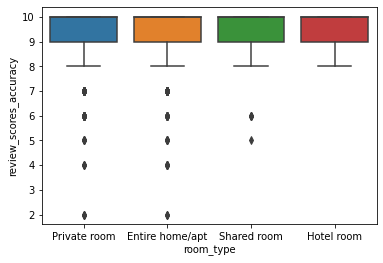

In [0]:
import seaborn as sns
ax = sns.boxplot(x="room_type", y='review_scores_accuracy', data=roomtype)

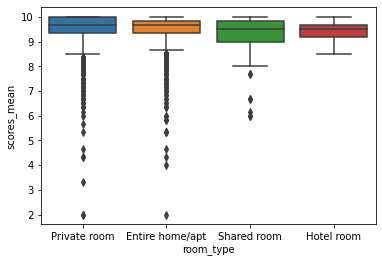

In [0]:
mean = sns.boxplot(x="room_type", y='scores_mean', data=roomtype)


In [0]:
neighbourhood = listings.groupby(['neighbourhood']).mean()
neighbourhood  = neighbourhood.sort_values('scores_mean',ascending=True)
neighbourhood.index

Index(['Ballybough', 'North Strand', 'Fairview', 'Donnycarney', 'Courtlands',
       'Ballymun', 'Inchicore', 'Knocklyon', 'Finglas', 'Phibsborough',
       'Georgian Quarter', 'East Wall', 'Beaumont',
       'North City Central/O'Connell Street', 'Temple Bar', 'Santry',
       'Dublin Industrial Estate', 'Riverston Abbey', 'Drumcondra',
       'City Centre', 'Stoneybatter/Arbour Hill', 'Kilmainham',
       'The Liberties', 'Crumlin', 'Cabra', 'Trinity College',
       'Grafton Street/St. Stephens Green', 'Docklands', 'Smithfield',
       'Clondalkin', 'Old City', 'Dundrum', 'Rialto',
       'Phoenix Park and Surrounds', 'Donnybrook', 'Ballsbridge',
       'Ballyfermot', 'Harold's Cross', 'Rathgar', 'Ranelagh and Rathmines',
       'Ringsend/Irishtown', 'Castleknock', 'Blackrock', 'Islandbridge',
       'Ardilea', 'Glasnevin', 'Pelletstown', 'Portobello', 'Kimmage',
       'Rathfarnham', 'Bonnybrook/Darndale', 'Artane', 'Terenure', 'Monkstown',
       'Sandymount', 'Addison Park', 'Clo

In [0]:
neighbourhood=neighbourhood.reset_index()
neighbourhood

,neighbourhood,scores_mean
0,Ballybough,9.075397
1,North Strand,9.166667
2,Fairview,9.218391
3,Donnycarney,9.250000
4,Courtlands,9.303030
...,...,...
61,Booterstown,9.757937
62,Marino,9.777778
63,Mount Merrion,9.824074
64,Dartry,9.833333


In [0]:
neighbourhood.nlargest(5, 'scores_mean')

In [0]:
neighbourhood.nsmallest(5, 'scores_mean')

In [0]:
neighbourhood.to_csv("/content/drive/My Drive/Continuous Assessment/neighbourhood_mean.csv", sep = ",", header=True, index=False)

In [0]:
listings.head(1)

,neighbourhood,scores_mean
0,Churchtown,10.0


In [0]:
roomtype = listings.groupby(['room_type']).mean()
roomtype=roomtype.reset_index()
roomtype

,room_type,id,latitude,longitude,review_scores_rating
0,Entire home/apt,2.249669e+07,53.341026,-6.259325,92.802248
1,Hotel room,3.169128e+07,53.344664,-6.255400,91.342466
2,Private room,2.270359e+07,53.344172,-6.259877,93.209215
3,Shared room,2.521735e+07,53.352854,-6.265474,88.956044


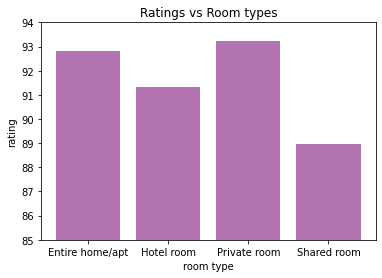

In [0]:
import matplotlib.pyplot as plt

y = roomtype.room_type
x = roomtype.review_scores_rating
y_pos = np.arange(len(x))

plt.bar(y_pos, x, color=(0.5,0.1,0.5,0.6))

plt.title('Ratings vs Room types')
plt.xlabel('room type')
plt.ylabel('rating')

plt.ylim(85,94)


plt.xticks(y_pos, y)
plt.show()


In [0]:
roomtype.to_csv("/content/drive/My Drive/Continuous Assessment/roomtype.csv", sep = ",", header=True, index=False)

Seasonality

In [0]:
path = "/content/drive/My Drive/Continuous Assessment/"
reviews = pd.read_csv(path+"reviews_clean.csv", sep=",")

In [0]:
reviews.dtypes

listing_id          int64
id                  int64
date               object
reviewer_id         int64
comments           object
comments_clean     object
polarity          float64
dtype: object

In [0]:
reviews=reviews.loc(axis=1)['date','polarity']
reviews.head(1)

,date,polarity
0,2011-03-20,0.233333


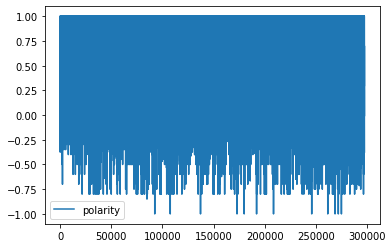

In [0]:
from matplotlib import pyplot
reviews.plot()
pyplot.show()

            polarity
date                
2011-03-31  0.441667
2011-04-30  0.280000
2011-05-31  0.324608
2011-06-30  0.371801
2011-07-31  0.318290
2011-08-31  0.360004
2011-09-30  0.376913
2011-10-31  0.562424
2011-11-30  0.417854
2011-12-31  0.241667
2012-01-31  0.307636
2012-02-29  0.192021
2012-03-31  0.342450


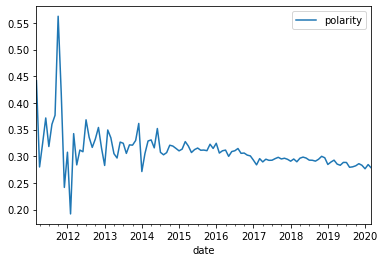

In [0]:
df = reviews.set_index(pd.DatetimeIndex(reviews['date']))
resample = df.resample('M')
monthly_mean = resample.mean()
print(monthly_mean.head(13))
monthly_mean.plot()
pyplot.show()

In [0]:
reviews.groupby('date')['polarity'].sum()

date
2011-03-20     0.233333
2011-03-28     0.650000
2011-04-21     0.280000
2011-05-13     0.000000
2011-05-17     0.428571
                ...    
2020-03-17    14.434446
2020-03-18    17.406078
2020-03-19     8.917536
2020-03-20     4.245714
2020-03-21     1.759343
Name: polarity, Length: 2840, dtype: float64

In [0]:
reviews = reviews.set_index(pd.DatetimeIndex(reviews['date']))

In [0]:
y =reviews.polarity.resample('M').sum()

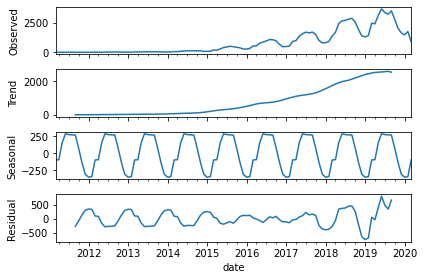

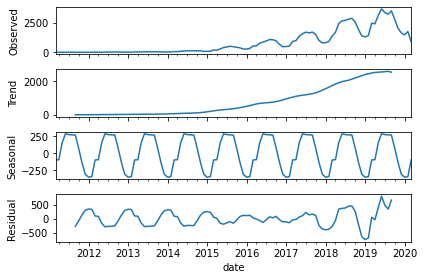

In [0]:
import statsmodels.api as sm
decomposition = sm.tsa.seasonal_decompose(y, model='additive')
decomposition.plot()

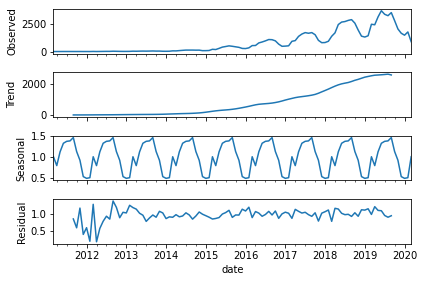

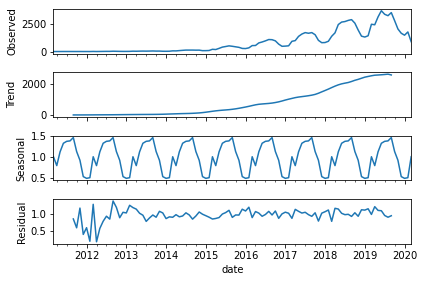

In [0]:
import statsmodels.api as sm
decomposition = sm.tsa.seasonal_decompose(y, model='multiplicative')
decomposition.plot()